![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Face Pose with Dlib




## Libraries

In [1]:
import dlib

## Model

In [2]:
!wget https://www.dropbox.com/s/l68dhjikrvd90y9/shape_predictor_68_face_landmarks.dat
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

--2025-04-22 08:09:32--  https://www.dropbox.com/s/l68dhjikrvd90y9/shape_predictor_68_face_landmarks.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bqpqry9qefxi8zpe7a8sg/shape_predictor_68_face_landmarks.dat?rlkey=wo4h6718eseh2lzi22o68rkw8 [following]
--2025-04-22 08:09:32--  https://www.dropbox.com/scl/fi/bqpqry9qefxi8zpe7a8sg/shape_predictor_68_face_landmarks.dat?rlkey=wo4h6718eseh2lzi22o68rkw8
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca6a343da24de8b7b5389a8efec.dl.dropboxusercontent.com/cd/0/inline/CoRV3ZMdW2GrJmq8xWEF-G73dkJk_iPoGQIHCJL2Y1SvArkoX9YsAI8MMP7ptnD9NBH5aBNcr1rIx61ayhY-RjzRqmp1-BzLhVmKObBnpxwQYVdJHvKl1rKdGFRqS6e8Y0c/file# [following]
--2025-04-22 08:09:32--  https://uca6a343da2

## Testing Images

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

--2025-04-22 08:09:41--  https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ds9vmznxcmhjjzqc0exgg/JohnLennon.jpg?rlkey=7qt6nqtyx66berbp5uut9jw0s [following]
--2025-04-22 08:09:42--  https://www.dropbox.com/scl/fi/ds9vmznxcmhjjzqc0exgg/JohnLennon.jpg?rlkey=7qt6nqtyx66berbp5uut9jw0s
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d4068004b743e6a5b063243b5.dl.dropboxusercontent.com/cd/0/inline/CoRwhcQFm6njSEGYwkOusGhMXi8SH0Ih74WokPpYAaIdwumH3ptag2P5LNBc0lseeJc_77lDVPxrGCufqZki2R-7gkeDR9CerF3wKgBoGPFCUl0xEDHOpYzq-KXkwIPGDEM/file# [following]
--2025-04-22 08:09:42--  https://uc6d4068004b743e6a5b063243b5.dl.dropboxusercontent.com/cd/0/inline/CoRwhcQFm6njS

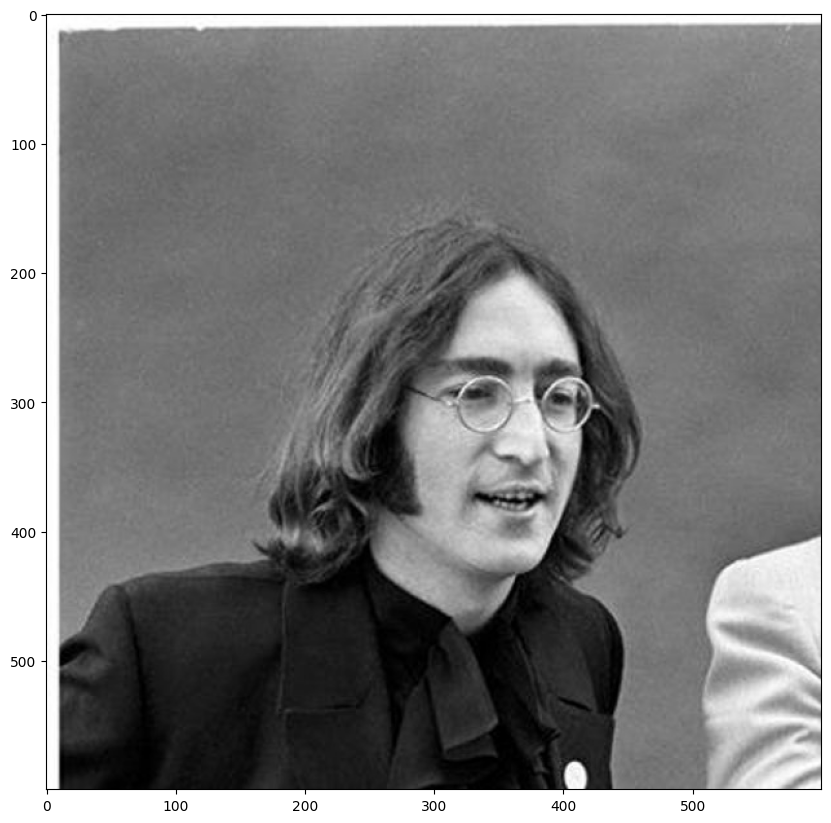

In [4]:
!wget https://www.dropbox.com/s/g4hee0epvla4n5j/JohnLennon.jpg
I = cv2.imread('JohnLennon.jpg')
plt.figure(figsize=(10,15))
plt.imshow(I)

## Face and landmarks

In [5]:
detector = dlib.get_frontal_face_detector()

In [6]:
fimg  = 'JohnLennon.jpg'
img   = dlib.load_rgb_image(fimg)
bb    = detector(img, 1)[0]
shape = predictor(img, bb)

In [7]:
# bounding box
y1 = max(0, bb.top())
y2 = min(bb.bottom(), img.shape[0])
x1 = max(0, bb.left())
x2 = min(bb.right(), img.shape[1])

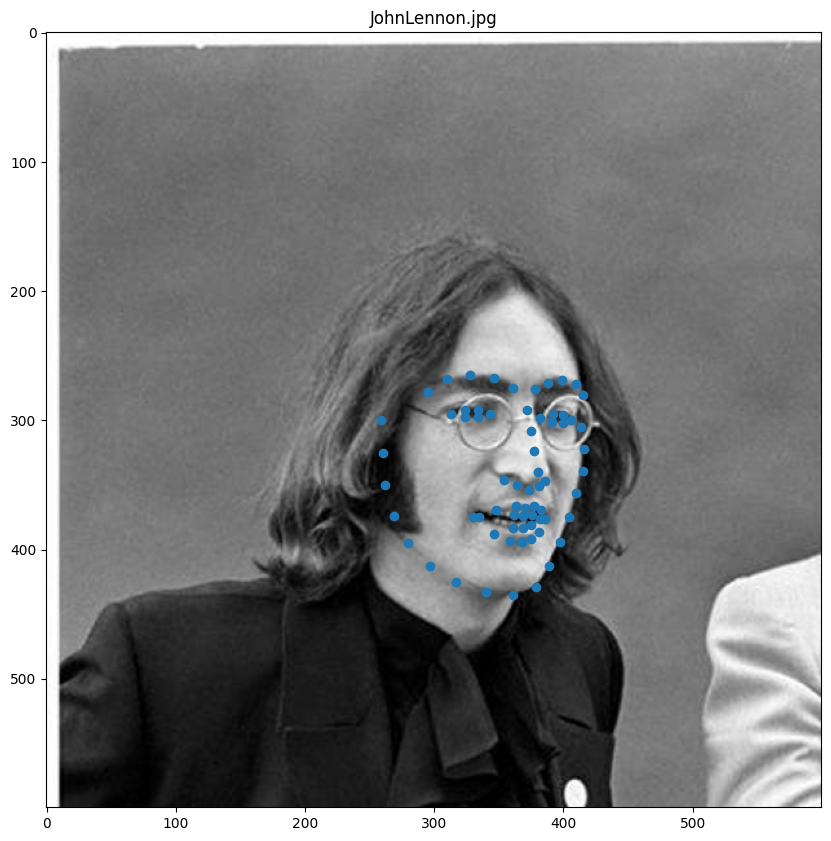

In [8]:
x = np.zeros((68,))
y = np.zeros((68,))
for i in range(68):
  x[i] = shape.part(i).x
  y[i] = shape.part(i).y

plt.figure(figsize=(10,15))
plt.imshow(img)
plt.title(fimg)
plt.scatter(x,y)
plt.show()


## Pose estimation based on landmarks

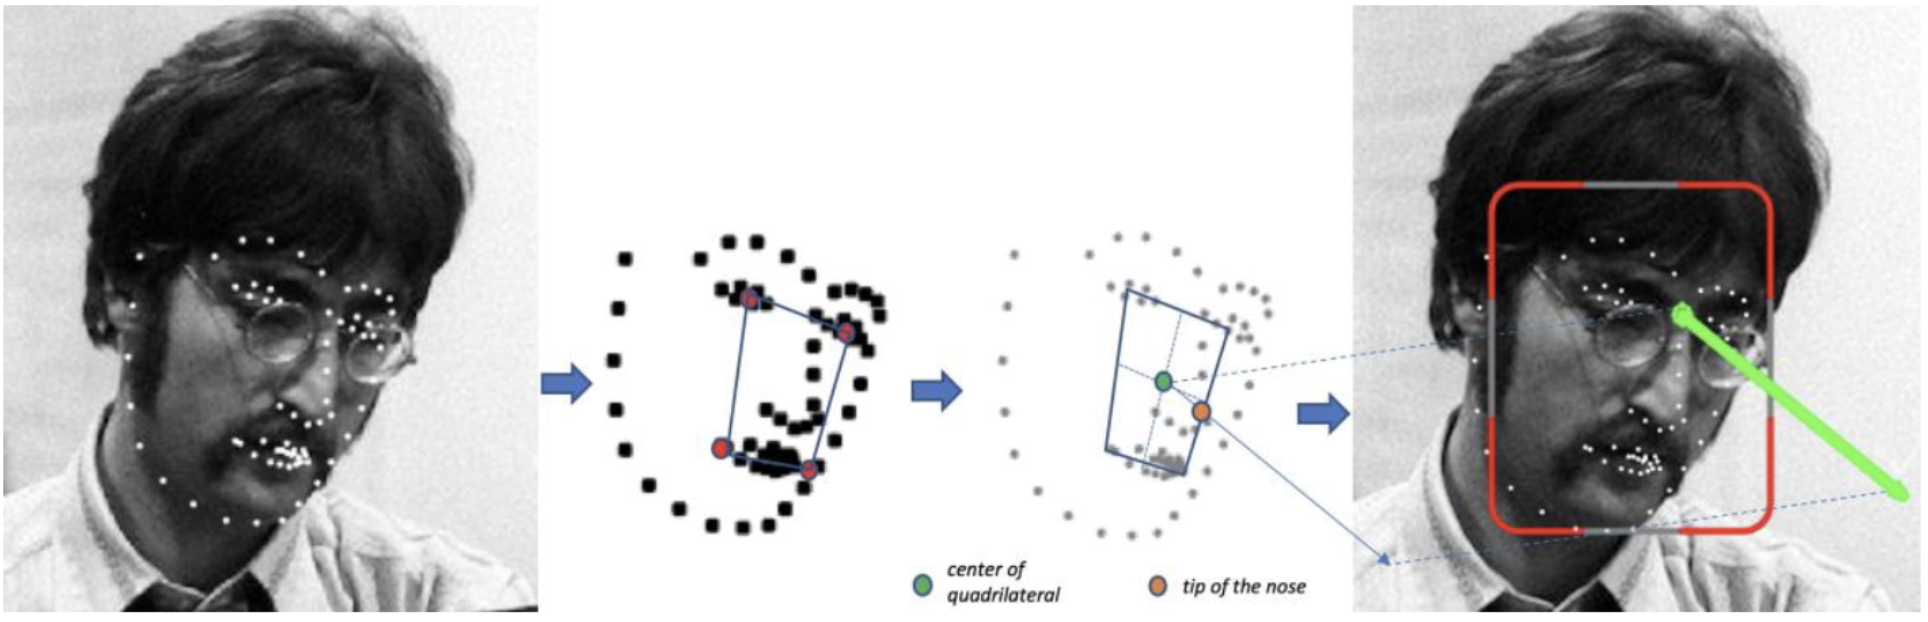

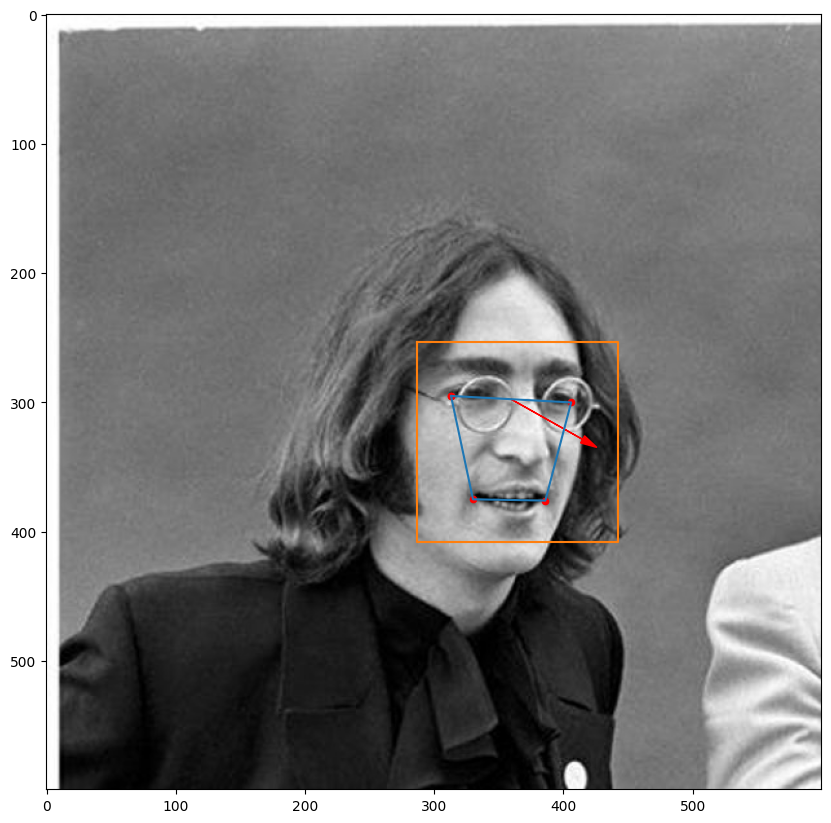

In [9]:
x_eye_left    = x[36]
y_eye_left    = y[36]
x_eye_right   = x[45]
y_eye_right   = y[45]

x_mouth_left  = x[48]
y_mouth_left  = y[48]
x_mouth_right = x[54]
y_mouth_right = y[54]


xp = [x_eye_left,x_eye_right,x_mouth_right,x_mouth_left,x_eye_left]
yp = [y_eye_left,y_eye_right,y_mouth_right,y_mouth_left,y_eye_left]

m1 = [xp[0],yp[0],1]
m2 = [xp[1],yp[1],1]
m3 = [xp[3],yp[3],1]
m4 = [xp[2],yp[2],1]


ell_1 = np.cross(m1,m4)
ell_2 = np.cross(m2,m3)
mc    = np.cross(ell_1,ell_2)
xc    = mc[0]/mc[2]
yc    = mc[1]/mc[2]


mn = [x[33],y[33],1] # nose
xn = mn[0]
yn = mn[1]
ell_n = np.cross(mc,mn)
a   = ell_n[0]
b   = ell_n[1]
c   = ell_n[2]

xr = 480
dr = xn-xc
xr = xc + 4*dr
yr = -(a*xr+c)/b


xt = (m1[0]+m2[0])/2
yt = (m1[1]+m2[1])/2
dx = xr-xc
dy = yr-yc



plt.figure(figsize=(10,15))
plt.imshow(img)
plt.scatter(xp, yp, s=20,c='red')
plt.plot(xp,yp)
d = np.sqrt(dx*dx+dy*dy)
plt.arrow(xt,yt,dx,dy,color='red',head_width=d/10, head_length=d/5)
plt.plot([x1, x1, x2, x2, x1],[y1, y2, y2, y1, y1])

plt.show()